In [2]:
#import libraries
import csv
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from os import system
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

In [3]:
#data import
file1="E:\\Study\\ML\\HW_1\\Dataset (2)\\Dataset\\Training\\Features_Variant_1.csv"
file2="E:\\Study\\ML\\HW_1\\Dataset (2)\\Dataset\\Training\\Features_Variant_2.csv"
file3="E:\Study\ML\HW_1\Dataset (2)\Dataset\Testing\TestSet\Test_Case_1.csv"
file4="E:\Study\ML\HW_1\Dataset (2)\Dataset\Testing\TestSet\Test_Case_2.csv"
head=["Page_Likes","Page_Checkins","Page talking about","Page Category","Derived5","Derived6","Derived7","Derived8",
          "Derived9","Derived10","Derived11","Derived12","Derived13","Derived14","Derived15","Derived16","Derived17",
          "Derived18","Derived19","Derived20","Derived21","Derived22","Derived23","Derived24","Derived25","Derived26","Derived27","Derived28","Derived29",
          "CC1","CC2","CC3","CC4","CC5","Base Time","Post_Length","Post Share Count","Post Promotion Status","H Local","PSun","PMon","PTue","PWed","PThurs","PFri","PSat",
          "BSun","BMon","BTue","BWed","BThurs","BFri","BSat","Target"]

training1 = pd.read_csv(file1,names=head)
training2 = pd.read_csv(file2,names=head)
test1 = pd.read_csv(file3,names=head)
test2 = pd.read_csv(file4,names=head)


In [4]:
#combine into master data
frames = [training2]
result = pd.concat(frames)


In [5]:
# split target and predictors and standardize predictors
y1=result.iloc[:,53]
head2=["Target"]
y2=pd.DataFrame(data=y1,columns=head2)
y2['TargetClass']=np.where(y2['Target']>15,1,0)
X1=result.iloc[:, [0,1,29,30,31,32,34,35,36,38]]
X2 = (X1 - X1.mean()) / X1.std()
X3=result.iloc[:, [40,41,42,43,44,45]]
X4 = (X3 - X3.mean()) / X3.std()
Xcon=np.concatenate((X2,X4),axis=1)
head1=["Page_Likes","Page_Checkins","CC1","CC2","CC3","CC4","Base Time","Post_Length","Post Share Count","H Local","PMon","PTue","PWed","PThurs","PFri","PSat"]
X=pd.DataFrame(data=Xcon,columns=head1)
y=pd.DataFrame(data=y2['TargetClass'])
y=np.ravel(y, order='C')


,Target,TargetClass
count,81312.000000,81312.000000
mean,7.190611,0.085436
std,36.049374,0.279532
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,3.000000,0.000000
max,1966.000000,1.000000


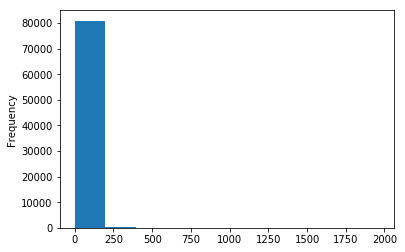

In [6]:
#Exploratory Data Analysis
y2['Target'].plot.hist()
y2.describe()

In [7]:
#learning curve function
sns.set(style="whitegrid")

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [8]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

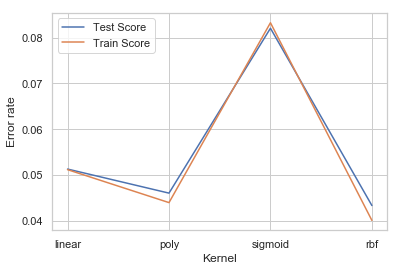

In [157]:
#SVM rough
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = SVC(kernel = kernel[i], random_state = 121)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9148790386338481, total=  16.4s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.4s remaining:    0.0s


[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9148790386338481, total=  16.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.5s remaining:    0.0s


[CV]  C=0.01, gamma=1, kernel=rbf, score=0.9148745519713262, total=  16.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9267379960997206, total=  12.3s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9250513888156855, total=  12.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV]  C=0.01, gamma=0.1, kernel=rbf, score=0.9273666455829643, total=  12.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.9309545143098087, total=  12.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.9295314394139039, total=  12.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=0.9293168880455408, total=  11.8s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV]  C=0.01, gamma=0.001, kernel=rbf, score=0.9161967005745006, total=  12.7s
[CV] C=0.01, gamma=0.001, kern

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 15.7min finished


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9582733162350098


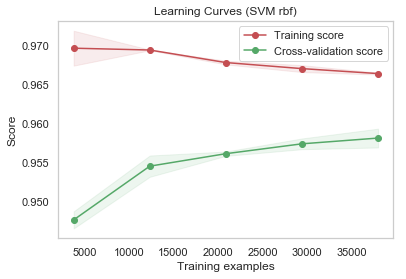

In [9]:
#RBF with CV using Grid search and Learning Curve
from sklearn.model_selection import KFold

param_grid = {'C': [0.01,0.1,1,10], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)
estimator1 = SVC(kernel = 'rbf', C=10, gamma=0.1, random_state = 121)

title = "Learning Curves (SVM rbf)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
plot_learning_curve(estimator1, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore1=cross_val_score(estimator1, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore1.mean())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.01, kernel=linear, score=0.9459231539556211, total=  11.4s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s


[CV] .. C=0.01, kernel=linear, score=0.9455015021346124, total=  12.1s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.8s remaining:    0.0s


[CV] .. C=0.01, kernel=linear, score=0.9466055239300021, total=  11.8s
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.9s remaining:    0.0s


[CV] ... C=0.1, kernel=linear, score=0.9472935223738997, total=  12.7s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9467664575976388, total=  13.2s
[CV] C=0.1, kernel=linear ............................................
[CV] ... C=0.1, kernel=linear, score=0.9485557663925785, total=  13.9s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9484003584040479, total=  20.2s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9477151741949086, total=  20.7s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9497153700189753, total=  20.0s
[CV] C=10, kernel=linear .............................................
[CV] .... C=10, kernel=linear, score=0.9488220102250566, total=  50.8s
[CV] C=10, kernel=linear .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.0min finished


{'C': 10, 'kernel': 'linear'}


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9488035570312331


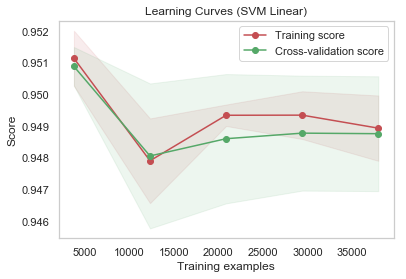

In [159]:
#Linear with CV using Grid search and Learning Curve
param_grid = {'C': [0.01,0.1,1,10], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)



title = "Learning Curves (SVM Linear)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator2 = SVC(kernel = 'linear',C=10, random_state = 121)
plot_learning_curve(estimator2, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscore2=cross_val_score(estimator2, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore2.mean())

In [196]:
#Poly with CV and Learning Curve using Grid Search
param_grid = {'degree': [2,3,4], 'kernel': ['poly'],'C': [0.01,0.1,1,10]} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.01, degree=2, kernel=poly ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.01, degree=2, kernel=poly, score=0.933220892847731, total=   9.0s
[CV] C=0.01, degree=2, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s remaining:    0.0s


[CV]  C=0.01, degree=2, kernel=poly, score=0.9336425446687397, total=   8.6s
[CV] C=0.01, degree=2, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.3s remaining:    0.0s


[CV]  C=0.01, degree=2, kernel=poly, score=0.9323213156230234, total=   8.9s
[CV] C=0.01, degree=3, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.6s remaining:    0.0s


[CV]  C=0.01, degree=3, kernel=poly, score=0.9329046539819744, total=   8.6s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.9324830021609656, total=   9.4s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV]  C=0.01, degree=3, kernel=poly, score=0.931214421252372, total=   8.3s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV]  C=0.01, degree=4, kernel=poly, score=0.9333790122806093, total=  11.9s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV]  C=0.01, degree=4, kernel=poly, score=0.9327992410267222, total=  12.3s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV]  C=0.01, degree=4, kernel=poly, score=0.9310035842293907, total=  11.8s
[CV] C=0.1, degree=2, kernel=poly ....................................
[CV]  C=0.1, degree=2, kernel=poly, score=0.9400200284614979, total=   8.8s
[CV] C=0.1, degree=2, kernel=poly ...

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 17.5min finished


{'C': 10, 'degree': 3, 'kernel': 'poly'}


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
0.9500333933633036


0.9565515351836741


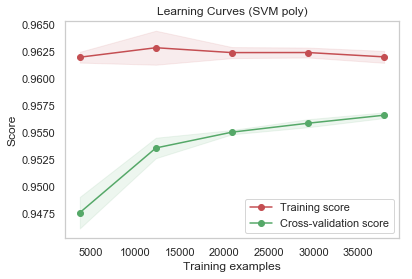

In [197]:
estimator3 = SVC(kernel = 'poly',C=10,degree=3, random_state = 121)
plot_learning_curve(estimator3, title, X_train, y_train,cv=cv)
crossvalscore3=cross_val_score(estimator3, X_train, y_train, cv=3)
print(crossvalscore3.mean())

0.9500333933633036


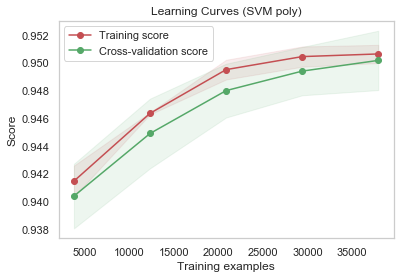

In [160]:
#Poly with CV degree 2 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator3 = SVC(kernel = 'poly',degree=2, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore3=cross_val_score(estimator3, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore3.mean())

0.9493130640940958


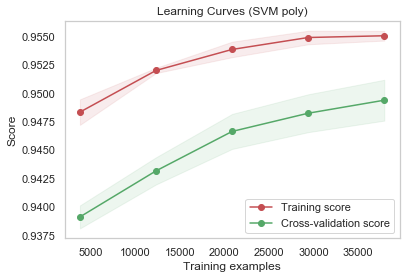

In [161]:
#Poly with CV degree 4 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator4 = SVC(kernel = 'poly',degree=4, random_state = 121)
#plot_learning_curve(estimator4, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore4=cross_val_score(estimator4, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore4.mean())

0.945166744326211


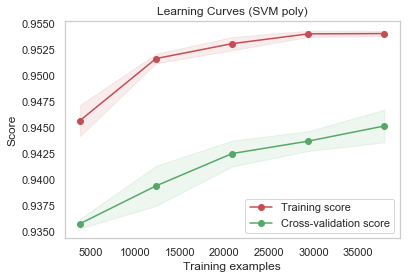

In [163]:
#Poly with CV degree 6 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator5 = SVC(kernel = 'poly',degree=6, random_state = 121)
#plot_learning_curve(estimator5, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore5=cross_val_score(estimator5, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore5.mean())

<module 'matplotlib.pyplot' from 'C:\\Users\\anush\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

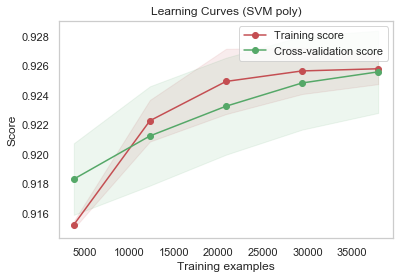

In [65]:
#Poly with CV degree 2, C 0.01 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)

estimator6 = SVC(kernel = 'poly',degree=2,C=0.01, random_state = 121)
#plot_learning_curve(estimator6, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore6=cross_val_score(estimator6, X, y, cv=3, n_jobs=-1)
print(crossvalscore6.mean())

0.9381641094700289


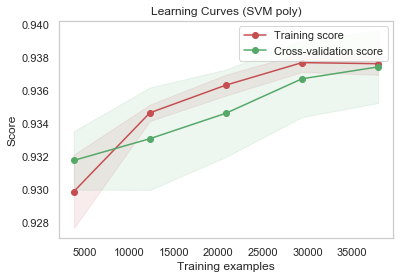

In [164]:
#Poly with CV degree 2, C 0.1 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)

estimator7 = SVC(kernel = 'poly',degree=2,C=0.1, random_state = 121)
#plot_learning_curve(estimator7, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore7=cross_val_score(estimator7, X, y, cv=3, n_jobs=-1)
print(crossvalscore7.mean())

0.941041908495461


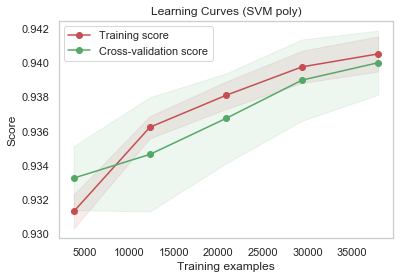

In [165]:
#Poly with CV degree 2, C 0.5 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)

estimator8 = SVC(kernel = 'poly',degree=2,C=0.5, random_state = 121)
#plot_learning_curve(estimator8, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore8=cross_val_score(estimator8, X, y, cv=3, n_jobs=-1)
print(crossvalscore8.mean())

0.9498351953700519


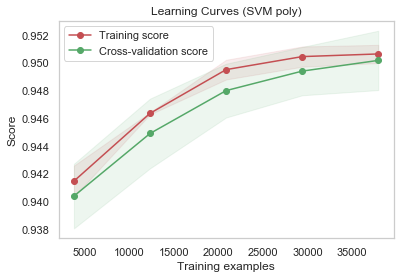

In [166]:
#Poly with CV degree 2, C 1 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)

estimator9 = SVC(kernel = 'poly',degree=2,C=1, random_state = 121)
#plot_learning_curve(estimator9, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore9=cross_val_score(estimator9, X, y, cv=3, n_jobs=-1)
print(crossvalscore9.mean())

0.9506468845897996


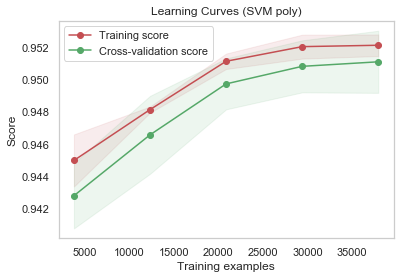

In [167]:
#Poly with CV degree 2, C 1.7 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator10 = SVC(kernel = 'poly',degree=2,C=1.7, random_state = 121)
#plot_learning_curve(estimator10, title, X_train, y_train, cv=cv, n_jobs=4)
crossvalscore10=cross_val_score(estimator10, X, y, cv=3, n_jobs=-1)
print(crossvalscore10.mean())

0.9511265126937589


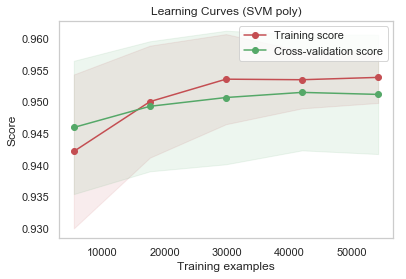

In [168]:
#Poly with CV degree 2, C 2.5 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator11 = SVC(kernel = 'poly',degree=2,C=2.5, random_state = 121)
#plot_learning_curve(estimator11, title, X, y, cv=cv, n_jobs=4)
crossvalscore11=cross_val_score(estimator11, X, y, cv=3, n_jobs=-1)
print(crossvalscore11.mean())

In [198]:
#Descision trees with different depth,leaf nodes, samples split
param_grid = {"criterion": ["gini", "entropy"],
             "min_samples_split": [5,10,15,20],
             "max_depth": np.arange(2,16),
             "min_samples_leaf": [5,10,15,20],
             "max_leaf_nodes": np.arange(5,21,5)
             }

dt = DecisionTreeClassifier()
ts_gs = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5, return_train_score=True)
ts_gs.fit(X_train,y_train)
print (ts_gs.best_params_)
print ('\n')
print (ts_gs.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 5}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [ ]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
plot_learning_curve(ts_gs, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(ts_gs, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())

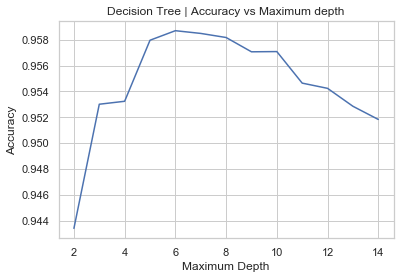

In [169]:
#Descision trees with different depth and graph
depth = []
for i in range(2,15):
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state=121)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=3, n_jobs=4)
    depth.append((i,scores.mean()))
    
depthg=pd.DataFrame(data=depth)
plt.plot(depthg.iloc[:,0],depthg.iloc[:,1])
plt.title("Decision Tree | Accuracy vs Maximum depth")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()

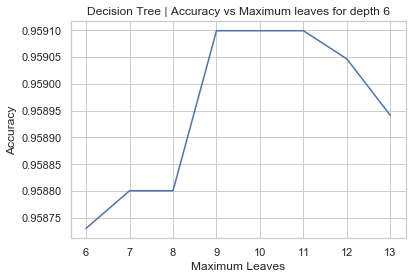

In [175]:
#Descision trees with different leaves and graph
leaf = []
for i in range(6,14):
    clf = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=i, random_state=121)
    # Perform 3-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=3, n_jobs=4)
    leaf.append((i,scores.mean()))
    
leafg=pd.DataFrame(data=leaf)
plt.plot(leafg.iloc[:,0],leafg.iloc[:,1])

plt.title("Decision Tree | Accuracy vs Maximum leaves for depth 6")
plt.xlabel("Maximum Leaves")
plt.ylabel("Accuracy")

plt.show()

In [180]:
#Validation Score of chosen decision tree 
finaldes = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=8, random_state=121)
finaldessc=cross_val_score(finaldes, X_train, y_train, cv=3, n_jobs=-1)
print(finaldessc.mean())

0.9588003865675091


In [10]:
#Descision trees with different depth,leaf nodes, samples split
param_grid = {"criterion": ["gini", "entropy"],
             "min_samples_split": [2,3,4,5],
             "max_depth": [2,3,4,5],
             "min_samples_leaf": [5,10,15,20],
             "max_leaf_nodes": [2,3,4,5]
             }

dt = DecisionTreeClassifier()
ts_gs = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3, return_train_score=True)
ts_gs.fit(X_train,y_train)
print (ts_gs.best_params_)
print ('\n')
print (ts_gs.best_estimator_)

{'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


0.9491198523854137


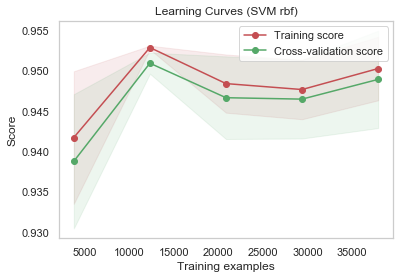

In [11]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
ts_gs=DecisionTreeClassifier(criterion = 'entropy',max_depth=2, max_leaf_nodes = 5, min_samples_leaf=5, min_samples_split=2)
plot_learning_curve(ts_gs, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(ts_gs, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())

In [ ]:
#Adaboost with CV using Grid search and Learning Curve
score_ada=[]
tuned_parameters = {'learning_rate':[0.01,0.1,1]}
for i in range(2,3,4,5):
   classifier_choice= AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=i,min_samples_leaf=5,min_samples_split=2, random_state=2))
   param_grid_ada= GridSearchCV(classifier_choice,tuned_parameters,cv=3, return_train_score=True)
   param_grid_ada.fit(X_train,y_train)
   print (param_grid_ada.best_params_)
   print (param_grid_ada.best_estimator_)
   crossvalscore_ada=cross_val_score(param_grid_ada, X_train, y_train, cv=3, n_jobs=-1)
   print(i)
   print(crossvalscore_ada.mean())
   print ('\n')
   score_ada.append((i,crossvalscore_ada.mean()))

score_ada_df=pd.DataFrame(score_ada)
plt.plot(score_ada_df.iloc[:,0],score_ada_df.iloc[:,1])
plt.title("AdaBoost | Depth vs Cross Validation Score")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
tuned_parameters = {'learning_rate':[0.001, 0.01,0.1, ],'n_estimators':[60,70,80,90,100]}


classifier_choice= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,min_samples_leaf=5, random_state=121))
grid1= GridSearchCV(classifier_choice,tuned_parameters,cv=3, return_train_score=True)
grid1.fit(X_train,y_train)
print (grid1.best_params_)
print ('\n')
print (grid1.best_estimator_)

cv = KFold(n_splits=3, random_state=11, shuffle=False)
plot_learning_curve(classifier_choice, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscoreada=cross_val_score(classifier_choice, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoreada.mean())

In [ ]:
#reporting E out for rbf
estimator1.fit(X_train, y_train)
eout1=estimator1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,eout1))